**Importing Required Libraries**

In [1]:
import numpy as np  # Import numpy library for efficient array operations
import pandas as pd  # Import pandas library for data processing
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for data visualization
%matplotlib inline


**Loading the Data**

In [2]:
data = pd.read_excel("Assignment 3 Dataset.xlsx")
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Display the information about the DataFrame's structure and column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


**Check for Missing Values**

In [4]:
# Calculate the number of missing values for each column in the dataset
data.isna().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [5]:
# Calculate the sum of 'Price' for rows where 'Itemname' is missing
data[data['Itemname'].isna()] ['Price'].sum()

0.0

Exploring Rows with Missing Item Names:
To investigate the data where the 'Itemname' column has missing values, we can filter the dataset to display only those rows. This subset of the data will provide insights into the records where the item names are not available.

In [6]:
# Filter the DataFrame to display rows where 'Itemname' is missing
data[data['Itemname'].isna()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
613,536414,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1937,536545,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1938,536546,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1939,536547,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1940,536549,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...
515623,581199,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
515627,581203,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
515633,581209,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
517266,581234,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


Upon examining the data where the 'Itemname' column has missing values, it becomes evident that these missing entries do not contribute any meaningful information. Given that the item names are not available for these records, it suggests that these instances may not be crucial for our analysis. As a result, we can consider these missing values as non-significant and proceed with our analysis without incorporating them

In [7]:
# Filter the DataFrame to exclude rows where 'Itemname' is missing 
data = data[data['Itemname'].notna()]
data['Itemname'].isna().sum()

0

Now we have no null values in the itemname column

Next, we turn our attention to the presence of missing values in the 'CustomerID' column. By investigating these missing values, we aim to identify any potential issues or data quality concerns associated with them. Analyzing the impact of missing 'CustomerID' values will help us assess the completeness and reliability of the dataset, enabling us to make informed decisions on handling or imputing these missing values. Let's dive deeper into this aspect and gain a comprehensive understanding of any issues related to missing 'CustomerID' values.

In [8]:
# Select a random sample of 30 rows where 'CustomerID' is missing
data[data['CustomerID'].isna()].sample(30)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
51292,540821,CAKE STAND VICTORIAN FILIGREE MED,3,2011-01-11 13:16:00,5.91,NaN,United Kingdom
199609,554957,JUMBO BAG PINK VINTAGE PAISLEY,3,2011-05-27 15:17:00,4.96,NaN,United Kingdom
331239,566985,JUMBO BAG RED RETROSPOT,15,2011-09-16 10:42:00,4.13,NaN,United Kingdom
175649,552514,FRIDGE MAGNETS US DINER ASSORTED,1,2011-05-09 16:30:00,10.79,NaN,United Kingdom
82383,543448,CERAMIC STRAWBERRY CAKE MONEY BANK,1,2011-02-08 12:12:00,4.13,NaN,United Kingdom
519524,581439,LADIES & GENTLEMEN METAL SIGN,3,2011-12-08 16:30:00,4.96,NaN,United Kingdom
407476,573177,SET OF 10 LANTERNS FAIRY LIGHT STAR,1,2011-10-28 10:29:00,4.15,NaN,United Kingdom
123544,547250,RED HEART SHAPE LOVE BUCKET,1,2011-03-22 09:30:00,5.79,NaN,United Kingdom
519412,581439,I LOVE LONDON MINI BACKPACK,1,2011-12-08 16:30:00,8.29,NaN,United Kingdom
400241,572553,STAR T-LIGHT HOLDER WILLIE WINKIE,1,2011-10-24 17:09:00,3.29,NaN,United Kingdom


This sample can provide us with a glimpse into the specific instances where 'CustomerID' is missing, aiding us in further analysis or decision-making related to handling these missing values.

Upon analyzing a sample of rows where the 'CustomerID' is missing, it appears that there is no discernible pattern or specific reason behind the absence of these values. This observation suggests that the missing 'CustomerID' entries were not filled accidentally or due to a systematic issue. Instead, it is possible that these missing values occur naturally in the dataset, without any particular significance or underlying cause.

However, we decided not to drop these missing values as it contributed to 25% of the entire data or 134041 instances in the dataset because we will lose too much important information by doing so. 

**Duplicate Data**

In [9]:
data.duplicated().sum()

5286

In [10]:
# Identify duplicate rows
duplicates = data.duplicated()

In [11]:
# Print the duplicate rows
print(data[duplicates])

        BillNo                           Itemname  Quantity  \
508     536409        UNION JACK FLAG LUGGAGE TAG         1   
518     536409      HAND WARMER SCOTTY DOG DESIGN         1   
528     536409     SET 2 TEA TOWELS I LOVE LONDON         1   
530     536409       SCOTTIE DOG HOT WATER BOTTLE         1   
546     536412  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...        ...                                ...       ...   
521833  581538        BLACK PIRATE TREASURE CHEST         1   
521847  581538     BOX OF 6 MINI VINTAGE CRACKERS         1   
521850  581538              REVOLVER WOODEN RULER         1   
521857  581538                        WICKER STAR         1   
521859  581538        JUMBO BAG VINTAGE CHRISTMAS         1   

                      Date  Price  CustomerID         Country  
508    2010-12-01 11:45:00   1.25     17908.0  United Kingdom  
518    2010-12-01 11:45:00   2.10     17908.0  United Kingdom  
528    2010-12-01 11:45:00   2.95     17908.0  Unit

In [12]:
# Drop duplicate rows
data = data.drop_duplicates()

In [13]:
# Checking duplicate again
data.duplicated().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515323 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      515323 non-null  object        
 1   Itemname    515323 non-null  object        
 2   Quantity    515323 non-null  int64         
 3   Date        515323 non-null  datetime64[ns]
 4   Price       515323 non-null  float64       
 5   CustomerID  382811 non-null  float64       
 6   Country     515323 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 31.5+ MB


**Removing Incorrect & Irrelevant Data**

In [15]:
# Print the number of unique countries in the 'Country' column
print("Number of unique countries:", data['Country'].nunique())

# Calculate and print the normalized value counts of the top 5 countries in the 'Country' column
print(data['Country'].value_counts(normalize=True)[:5])

Number of unique countries: 30
United Kingdom    0.933292
Germany           0.017517
France            0.016287
Spain             0.004813
Netherlands       0.004585
Name: Country, dtype: float64


Considering that the majority of transactions (approximately 93%) in the dataset originate from the UK, the 'Country' column may not contribute significant diversity or variability to the analysis. Therefore, we can choose to remove the 'Country' column from the DataFrame df. we indicate that we want to drop a column, This step allows us to focus on other attributes that may provide more valuable insights for our analysis.

In [16]:
# Delete the 'Country' column from the DataFrame
data.drop('Country', axis=1, inplace=True)

In [17]:
# Since BillNo datatype is object, it means that there are non digit values in it.
# Filter the DataFrame to display rows where 'BillNo' column contains non-digit values
data[data['BillNo'].str.isdigit() == False]

,BillNo,Itemname,Quantity,Date,Price,CustomerID
288772,A563185,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN
288773,A563186,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN
288774,A563187,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN


Since the item name "Adjust bad debt" was filled accidentally and does not provide any useful information for our analysis, we can choose to remove the corresponding rows from the DataFrame. The code snippet above filters the DataFrame df to retain only the rows where the 'Itemname' column does not contain the value "Adjust bad debt". This operation effectively eliminates the rows associated with the accidental data entry, ensuring the dataset is free from this irrelevant item name.

In [18]:
# Remove rows where the 'Itemname' column contains "Adjust bad debt"
data = data[data['Itemname'] != "Adjust bad debt"]

In [19]:
# Checking if all BillNo doesn't inculde letters 
data['BillNo'].astype("int64")

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
522059    581587
522060    581587
522061    581587
522062    581587
522063    581587
Name: BillNo, Length: 515320, dtype: int64

we are intrigued by the existence of negative quantities within the dataset. To gain a deeper understanding of this phenomenon, we focus our attention on these specific instances and aim to uncover the underlying reasons behind their occurrence. Through this exploration, we expect to gain valuable insights into the nature of these negative quantities and their potential impact on our analysis. Our investigation aims to reveal the intriguing stories that lie within this aspect of the data

In [20]:
# Filter the DataFrame to display rows where 'Quantity' is less than 1
data[data['Quantity'] < 1]

,BillNo,Itemname,Quantity,Date,Price,CustomerID
7122,537032,?,-30,2010-12-03 16:50:00,0.0,NaN
12926,537425,check,-20,2010-12-06 15:35:00,0.0,NaN
12927,537426,check,-35,2010-12-06 15:36:00,0.0,NaN
12973,537432,damages,-43,2010-12-06 16:10:00,0.0,NaN
20844,538072,faulty,-13,2010-12-09 14:10:00,0.0,NaN
...,...,...,...,...,...,...
515634,581210,check,-26,2011-12-07 18:36:00,0.0,NaN
515636,581212,lost,-1050,2011-12-07 18:38:00,0.0,NaN
515637,581213,check,-30,2011-12-07 18:38:00,0.0,NaN
517209,581226,missing,-338,2011-12-08 09:56:00,0.0,NaN


Given the observation that negative quantities might be filled with system issues or irrelevant information for our analysis, it is reasonable to proceed with removing these rows from the dataset. By doing so, we can ensure the accuracy and reliability of our data, as well as eliminate potential biases or misleading information stemming from negative quantities

In [21]:
# Remove rows where 'Quantity' is less than 1
data = data[data['Quantity'] >= 1]

we now shift our focus to the 'Price' column and investigate it for any potential issues or anomalies. By thoroughly examining the data within this column, we aim to identify any irregularities, inconsistencies, or outliers that may affect the overall quality and integrity of the dataset. Analyzing the 'Price' column is crucial in ensuring accurate and reliable pricing information for our analysis. Let's dive deeper into the 'Price' column and uncover any issues that may require attention.

In [22]:
# Counting the number of rows where the price is zero
zero_price_count = len(data[data['Price'] == 0])
print("Number of rows where price is zero:", zero_price_count)

# Counting the number of rows where the price is negative
negative_price_count = len(data[data['Price'] < 0])
print("Number of rows where price is negative:", negative_price_count)

Number of rows where price is zero: 578
Number of rows where price is negative: 0


our attention now turns to the presence of zero charges in the 'Price' column. It is important to explore instances where products were offered free of cost, as this information can provide valuable insights into promotional activities, giveaways, or other unique aspects of the dataset. By examining the data related to zero charges in the 'Price' column, we can gain a deeper understanding of these transactions and their potential impact on our analysis. Let's delve into the details of these zero-priced transactions and uncover any significant findings.

In [23]:
# Selecting a random sample of 20 rows where the price is zero
data[data['Price'] == 0].sample(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID
40288,539856,AIRLINE BAG VINTAGE TOKYO 78,3,2010-12-22 14:41:00,0.0,NaN
233689,558340,JUMBO BAG SPACEBOY DESIGN,1,2011-06-28 14:01:00,0.0,NaN
332240,567152,found,3,2011-09-16 15:58:00,0.0,NaN
348026,568384,Manual,1,2011-09-27 09:46:00,0.0,12748.0
172114,552230,SET OF 20 KIDS COOKIE CUTTERS,1,2011-05-06 15:43:00,0.0,NaN
233696,558340,OWL DOORSTOP,1,2011-06-28 14:01:00,0.0,NaN
450567,576426,found,240,2011-11-15 11:24:00,0.0,NaN
301868,564530,FRENCH BLUE METAL DOOR SIGN 1,3,2011-08-25 14:57:00,0.0,NaN
302708,564645,amazon,44,2011-08-26 13:38:00,0.0,NaN
9097,537197,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0


Upon reviewing the sample of rows where the price is zero, we have identified that these entries might provide misleading or inaccurate information for our analysis. Therefore, it is prudent to proceed with removing these rows from the dataset to ensure the integrity and reliability of our analysis

In [24]:
# Remove rows where the price is zero
data = data[data['Price'] != 0]

In [25]:
# Checking the number of rows where the price is zero
zero_price_count = len(data[data['Price'] == 0])
print("Number of rows where price is zero:", zero_price_count)

Number of rows where price is zero: 0


**OUTLIER**

Text(0.5, 1.0, 'Quantity')

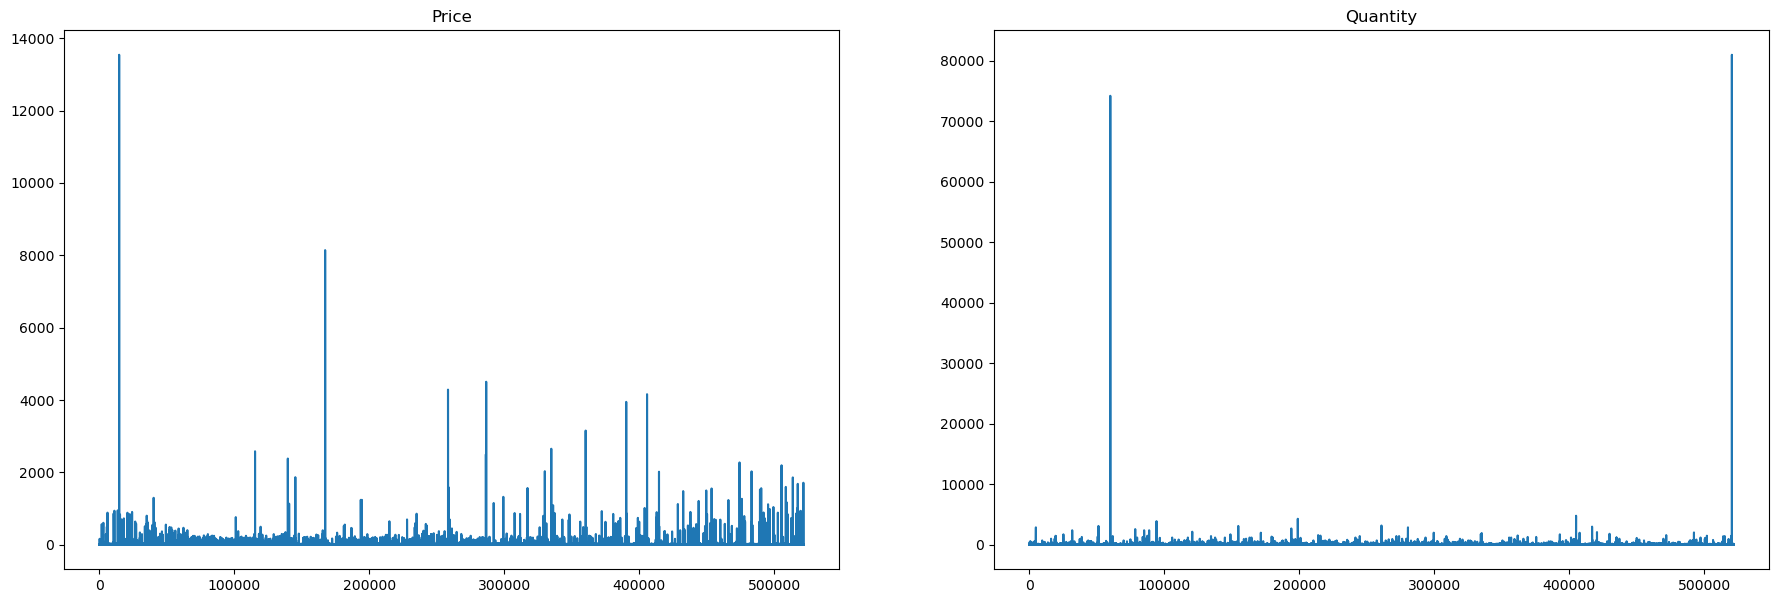

In [26]:
plt.figure(figsize=(22,7))
plt.subplot(1,2,1)
data.Price.plot()
plt.title("Price")
plt.subplot(1,2,2)
data.Quantity.plot()
plt.title("Quantity")

We can see that few values in Price and Quantity is relative high and different from the remaning values. Just because ssome item price and quantity are high, that does not mean that they are wrong to be included.

**Data Feature Engineering**

In [27]:
# Calculate the total price by multiplying the quantity and price columns
data['Total_Price'] = data.Quantity * data.Price
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,10.20
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,12.60
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,16.60
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,16.60


**Exploratory Data Analysis**

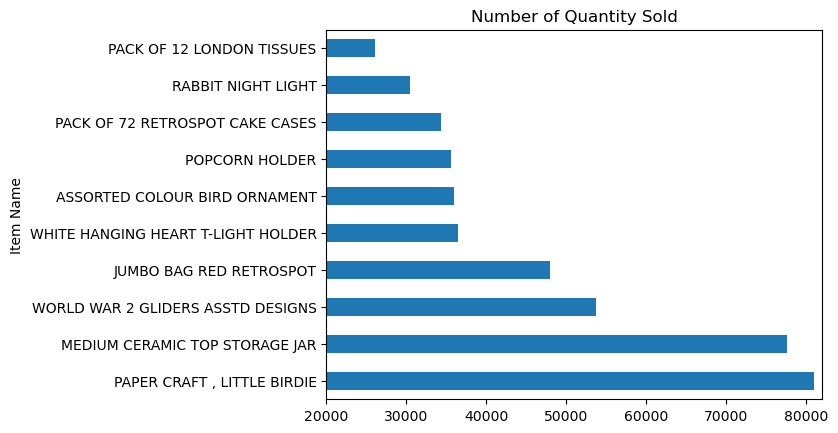

In [28]:
# Plotting the top 10 most sold products by quantity 
data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

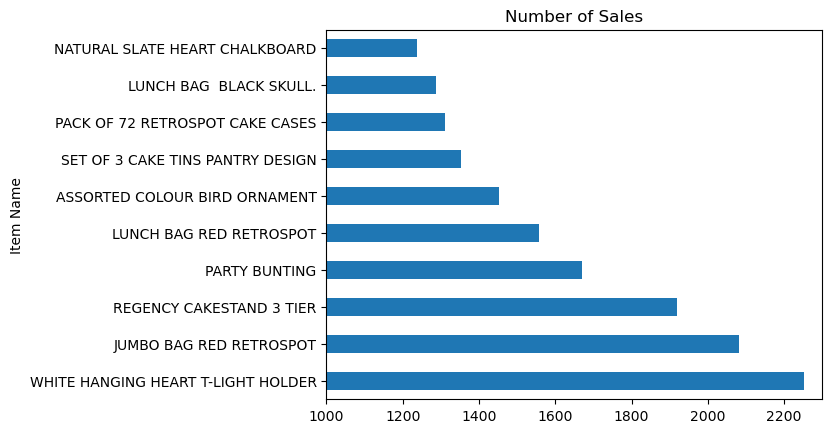

In [29]:
# Plotting the top 10 most sold products by transaction
data['Itemname'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('Item Name')
plt.xlim(1000, 2300)
plt.show()

Observing the plots, we can infer that there are products that are sold more frequently (higher count) compared to others, despite having relatively lower quantities sold per transaction. This indicates the presence of items that are commonly purchased in larger quantities at once. These products might include items that are frequently bought in bulk or items that are typically sold in larger packages or quantities.

This insight highlights the importance of considering both the quantity sold and the count of sales when analyzing the popularity and demand for different products. It suggests that some items may have a higher turnover rate due to frequent purchases, while others may have a higher quantity per sale, leading to different sales patterns and customer behaviors. Understanding these dynamics can be valuable for inventory management, pricing strategies, and identifying customer preferences.

**Validation Split**

Since we will be using unsupervised learning, we are not required to do split the data into test and validation. The algorithm we will be using is Apriori Algorithm and unsupervised learning

**Apriori Algorithm**

In [30]:
# Assign the original DataFrame to df2
data2 = data

# Filter rows based on item occurrences
item_counts = data2['Itemname'].value_counts(ascending=False)
filtered_items = item_counts.loc[item_counts > 1].reset_index()['index']
data2 = data2[data2['Itemname'].isin(filtered_items)]

# Filter rows based on bill number occurrences
bill_counts = data2['BillNo'].value_counts(ascending=False)
filtered_bills = bill_counts.loc[bill_counts > 1].reset_index()['index']
data2 = data2[data2['BillNo'].isin(filtered_bills)]

In [31]:
# Create a pivot table using the filtered DataFrame
pivot_table = pd.pivot_table(data2[['BillNo','Itemname']], 
                             index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)

In [32]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Generate frequent itemsets with minimum support of 0.1 (1)
frequent_itemsets = apriori(pivot_table, min_support=0.01,use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, "confidence", min_threshold = 0.5)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
rules 


Frequent Itemsets:
       support                                           itemsets
0     0.017374                           (10 COLOUR SPACEBOY PEN)
1     0.013754                  (12 MESSAGE CARDS WITH ENVELOPES)
2     0.019657                    (12 PENCIL SMALL TUBE WOODLAND)
3     0.019824              (12 PENCILS SMALL TUBE RED RETROSPOT)
4     0.019601                      (12 PENCILS SMALL TUBE SKULL)
...        ...                                                ...
2467  0.010358  (LUNCH BAG CARS BLUE, LUNCH BAG SUKI DESIGN, L...
2468  0.010190  (LUNCH BAG CARS BLUE, LUNCH BAG SUKI DESIGN, L...
2469  0.010302  (LUNCH BAG CARS BLUE, LUNCH BAG WOODLAND, LUNC...
2470  0.010469  (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
2471  0.011304  (CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...

[2472 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.023165,0.071222,0.013030,0.562500,7.897869,0.011381,2.122922,0.894095
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.044437,0.071222,0.024223,0.545113,7.653741,0.021058,2.041777,0.909773
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.023221,0.053569,0.015258,0.657074,12.265843,0.014014,2.759871,0.940308
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.023221,0.042265,0.011694,0.503597,11.915148,0.010713,1.929350,0.937851
4,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.023221,0.057133,0.015815,0.681055,11.920457,0.014488,2.956206,0.937889
...,...,...,...,...,...,...,...,...,...,...
1392,"(STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...","(RED RETROSPOT CHARLOTTE BAG, CHARLOTTE BAG PI...",0.016761,0.028956,0.011304,0.674419,23.290787,0.010819,2.982491,0.973380
1393,"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...","(WOODLAND CHARLOTTE BAG, CHARLOTTE BAG PINK PO...",0.018488,0.021829,0.011304,0.611446,28.011080,0.010901,2.517464,0.982463
1394,"(WOODLAND CHARLOTTE BAG, CHARLOTTE BAG PINK PO...","(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...",0.021829,0.018488,0.011304,0.517857,28.011080,0.010901,2.035729,0.985819
1395,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG PINK ...","(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT...",0.020993,0.018599,0.011304,0.538462,28.951175,0.010914,2.126369,0.986162


In [33]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.011471,0.039314,0.011193,0.975728,24.818876,0.010742,39.580265,0.970845
613,"(HERB MARKER THYME, HERB MARKER CHIVES)",(HERB MARKER PARSLEY),0.010413,0.012919,0.010079,0.967914,74.921584,0.009945,30.764023,0.997035
608,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER PARSLEY),0.010358,0.012919,0.010023,0.967742,74.908231,0.009890,30.599510,0.996977
621,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010358,0.012919,0.010023,0.967742,74.908231,0.009890,30.599510,0.996977
1220,"(HERB MARKER BASIL, HERB MARKER PARSLEY, HERB ...",(HERB MARKER THYME),0.010580,0.012919,0.010190,0.963158,74.553403,0.010054,26.792198,0.997137
...,...,...,...,...,...,...,...,...,...,...
25,(RED RETROSPOT CUP),(BLUE POLKADOT CUP),0.021383,0.018042,0.010692,0.500000,27.712963,0.010306,1.963916,0.984978
1156,"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...","(WOODLAND CHARLOTTE BAG, CHARLOTTE BAG PINK PO...",0.026840,0.021829,0.013420,0.500000,22.905612,0.012834,1.956343,0.982719
113,(HAND WARMER RED LOVE HEART),(HAND WARMER SCOTTY DOG DESIGN),0.021940,0.030237,0.010970,0.500000,16.535912,0.010307,1.939526,0.960601
147,(LOVE HOT WATER BOTTLE),(HOT WATER BOTTLE KEEP CALM),0.025838,0.042711,0.012919,0.500000,11.706649,0.011815,1.914578,0.938836


In [34]:
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
161,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.067324,0.113988,0.045606,0.677419,5.942890,0.037932,2.746637,0.891769
105,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.056187,0.054182,0.040650,0.723489,13.352938,0.037606,3.420539,0.980183
104,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.054182,0.056187,0.040650,0.750257,13.352938,0.037606,3.779137,0.978106
174,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.065598,0.113988,0.040149,0.612054,5.369454,0.032672,2.283855,0.870889
172,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.064874,0.113988,0.037643,0.580258,5.090505,0.030249,2.110846,0.859302
...,...,...,...,...,...,...,...,...,...,...
611,(HERB MARKER PARSLEY),"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",0.012919,0.010358,0.010023,0.775862,74.908231,0.009890,4.415328,0.999564
682,"(JUMBO BAG VINTAGE LEAF, JUMBO BAG ALPHABET)",(JUMBO BAG RED RETROSPOT),0.016928,0.113988,0.010023,0.592105,5.194444,0.008094,2.172158,0.821391
603,"(HERB MARKER CHIVES, HERB MARKER PARSLEY)",(HERB MARKER MINT),0.010580,0.013142,0.010023,0.947368,72.088314,0.009884,18.750306,0.996673
117,(HERB MARKER CHIVES),(HERB MARKER BASIL),0.011471,0.013086,0.010023,0.873786,66.772155,0.009873,7.819395,0.996454


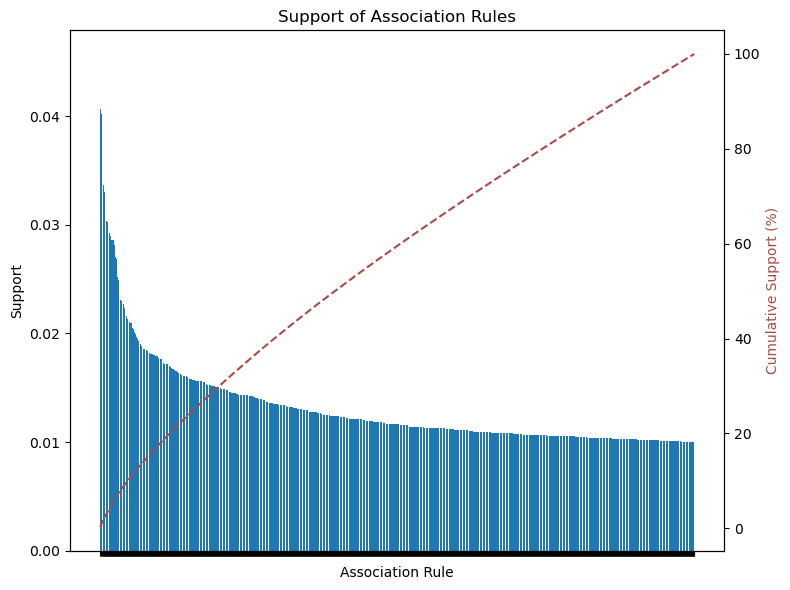

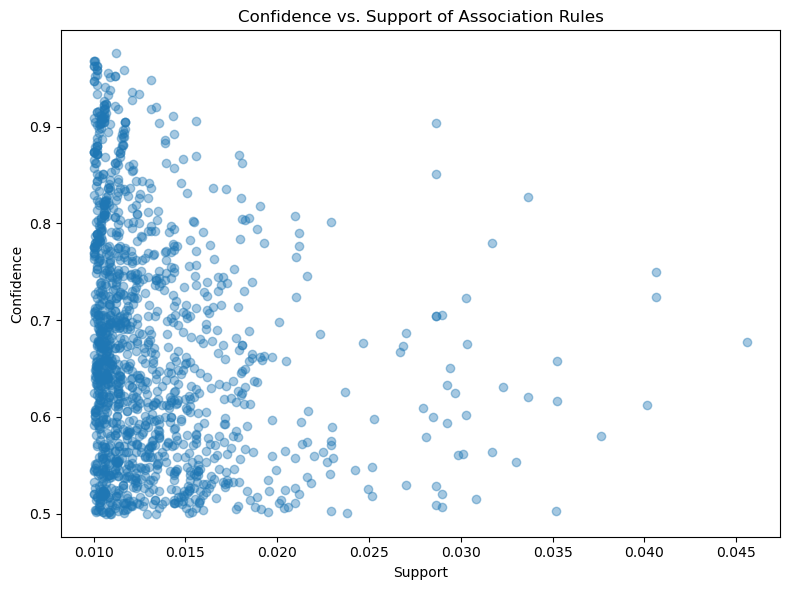

In [35]:
# Sort rules by support in descending order
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center')
plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')

# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color='#AA4A44', linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', c='#AA4A44')

plt.tight_layout()
plt.show()

#Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

In [36]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(5)

# Filter association rules for upselling opportunities
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]

# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)


In [37]:
# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

Cross-Selling Recommendations:
Customers who bought 'BEADED CRYSTAL HEART PINK ON STICK' also bought 'DOTCOM POSTAGE'.
Customers who bought 'HERB MARKER THYME' also bought 'HERB MARKER ROSEMARY'.
Customers who bought 'HERB MARKER ROSEMARY' also bought 'HERB MARKER THYME'.
Customers who bought 'HERB MARKER CHIVES' also bought 'HERB MARKER PARSLEY'.
Customers who bought 'REGENCY TEA PLATE PINK' also bought 'REGENCY TEA PLATE GREEN'.


In [38]:
top_upselling = upselling_rules.sort_values(['confidence', 'support'], 
                                            ascending=False).drop_duplicates('antecedents')[:5]
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")


Upselling Recommendations:
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER THYME, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER THYME', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER PARSLEY', recommend the following upgrades: HERB MARKER THYME, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER ROSEMARY', recommend the following upgrades: HERB MARKER THYME, HERB MARKER PARSLEY.
For customers who bought 'REGENCY TEA PLATE PINK', recommend the following upgrades: REGENCY TEA PLATE ROSES, REGENCY TEA PLATE GREEN.


In [39]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

#17850.0
# Create a DataFrame from the pre-processed data
df = pd.DataFrame(data)

# Create a user-item interaction matrix
user_item_matrix = df.pivot_table(index='CustomerID', columns='Itemname', aggfunc='size', fill_value=0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Function to make recommendations for a given user
def recommend_items(user_id):
    user_index = df[df['CustomerID'] == user_id].index[0]
    user_similarities = user_similarity[user_index]
    similar_users = user_similarities.argsort()[-2:-6:-1]  # Get top 5 similar users
    recommended_items = user_item_matrix.iloc[similar_users].sum().sort_values(ascending=False)
    return recommended_items

# Make top 5 recommendations for a specific user (For example user- 17850.0)
user_id = 17850.0
recommendations = recommend_items(user_id)
print("Recommended Items:")
print(recommendations.head(5))


Recommended Items:
Itemname
MEDIUM CERAMIC TOP STORAGE JAR    5
SMALL CERAMIC TOP STORAGE JAR     2
10 COLOUR SPACEBOY PEN            1
WHITE FRANGIPANI NECKLACE         1
REX CASH+CARRY JUMBO SHOPPER      1
dtype: int64
